In [1]:
import iris 
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import numpy as np

%matplotlib inline

### Import simulations from data_dir and perturbed controls from data_dir1

In [2]:
data_dir = '/shared/netscratch/lrm49/UKCA_VN112_QBO_SIMS/'
data_dir1 = '/shared//netscratch/lrm49/UKCA_VN112_QBO_SIMS/PERTLIM_CONTROLS/'

In [9]:
JNW = iris.load(data_dir + 'JAN_W/u-bo1**_all_vars_processed.nc', 'x_wind')
JNE = iris.load(data_dir + 'JAN_E/u-bo3**_all_vars_processed.nc', 'x_wind')
JLW = iris.load(data_dir + 'JULY_W/u-bn***_all_vars_processed.nc', 'x_wind')
JLE = iris.load(data_dir + 'JULY_E/u-bo0**_all_vars_processed.nc', 'x_wind')


In [11]:
JAN_W = iris.load(data_dir+'JAN_W/u-bl775_all_vars_processed.nc', 'x_wind')
JNW1 = iris.load(data_dir1+'u-br303_all_vars_processed.nc', 'x_wind')
JNW2 = iris.load(data_dir1+'u-br304_all_vars_processed.nc', 'x_wind')
JUL_E= iris.load(data_dir+'JULY_E/u-bl775_all_vars_processed.nc', 'x_wind')
JLE1 = iris.load(data_dir1+'u-br015_all_vars_processed.nc', 'x_wind')
JLE2 = iris.load(data_dir1+'u-br016_all_vars_processed.nc', 'x_wind')
JUL_W = iris.load(data_dir+'JULY_W/u-bl775_all_vars_processed.nc', 'x_wind')
JLW1 = iris.load(data_dir1+'u-br011_all_vars_processed.nc', 'x_wind')
JLW2 = iris.load(data_dir1+'u-br012_all_vars_processed.nc', 'x_wind')
JAN_E = iris.load(data_dir+'JAN_E/u-bl775_all_vars_processed.nc', 'x_wind')
JNE1 = iris.load(data_dir1+'u-br301_all_vars_processed.nc', 'x_wind')
JNE2 = iris.load(data_dir1+'u-br302_all_vars_processed.nc', 'x_wind')

# Constrain data to get equatorial x wind

### Select x wind

In [12]:
list_x = [JNW, JNE, JLW, JLE]

In [14]:
control_list = [JAN_W, JNW1,JNW2,JAN_E, JNE1,JNE2,  JUL_W, JLW1,JLW2,  JUL_E, JLE1, JLE2] 

### Collapse over latitude

In [15]:
latlist = []
for eruption in list(list_x):
    lat_constraint = eruption.extract(iris.Constraint(latitude = lambda cell: -2 <= cell <=2))
    latlist.append(lat_constraint)

In [16]:
latlist_cont = []
for eruption in control_list:
    lat_constraint = eruption.extract(iris.Constraint(latitude = lambda cell: -2 <= cell <=2))
    latlist_cont.append(lat_constraint)

### Find bounds

In [17]:
import iris.analysis.cartography

In [20]:
latlist[0][0].coord('latitude').guess_bounds()
latlist[0][0].coord('longitude').guess_bounds()

In [21]:
grid_areas = iris.analysis.cartography.area_weights(latlist[0][0])

### Average over area

In [23]:
JNW_list = []
for eruption in latlist[0]:
    area_average = eruption.collapsed(['latitude', 'longitude'], iris.analysis.MEAN, weights = grid_areas)
    JNW_list.append(area_average)

/usr/local/lib/python2.7/dist-packages/Iris-1.10.0-py2.7.egg/iris/coords.py:992: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for u'latitude'.
  warnings.warn(msg.format(self.name()))
/usr/local/lib/python2.7/dist-packages/Iris-1.10.0-py2.7.egg/iris/coords.py:992: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for u'longitude'.
  warnings.warn(msg.format(self.name()))


In [24]:
JNE_list = []
for eruption in latlist[1]:
    area_average = eruption.collapsed(['latitude', 'longitude'], iris.analysis.MEAN, weights = grid_areas)
    JNE_list.append(area_average)

In [25]:
JLW_list = []
for eruption in latlist[2]:
    area_average = eruption.collapsed(['latitude', 'longitude'], iris.analysis.MEAN, weights = grid_areas)
    JLW_list.append(area_average)

In [26]:
JLE_list = []
for eruption in latlist[3]:
    area_average = eruption.collapsed(['latitude', 'longitude'], iris.analysis.MEAN, weights = grid_areas)
    JLE_list.append(area_average)

In [27]:
full_list = [JNW_list, JNE_list, JLW_list, JLE_list ]

In [33]:
areaav_list_cont = []
for eruptions in latlist_cont:
    for eruption in eruptions:
        area_average = eruption.collapsed(['latitude', 'longitude'], iris.analysis.MEAN)
        areaav_list_cont.append(area_average)

/usr/local/lib/python2.7/dist-packages/Iris-1.10.0-py2.7.egg/iris/cube.py:3254: UserWarning: Collapsing spatial coordinate u'latitude' without weighting
  warnings.warn(msg.format(coord.name()))


In [36]:
control_list = [areaav_list_cont[0:3], areaav_list_cont[3:6], areaav_list_cont[6:9], areaav_list_cont[9:12]]

# Design plot

In [37]:
x = np.linspace(0, 36, 36)
legend_labels = ['EQ 60 Tg', '45$^\circ$N 60 Tg', '45$^\circ$S 60 Tg', 'EQ 15 Tg', '45$^\circ$N 15 Tg', '45$^\circ$S 15 Tg', 'Control 0', 'Control 1']
names = ['January, w-QBO', 'July, w-QBO', 'January, e-QBO', 'July, e-QBO']
letter_labels = ('a)', 'b)', 'c)', 'd)')

In [38]:
line_colours = ['blue', 'darkgoldenrod', 'red', 'cyan', 'gold', 'salmon']

## A function to extract defined pressures

In [39]:
def pressure_selection(press):
    return eruption.extract(iris.Constraint(pressure = press))

In [16]:
def pressure_plot(title):
    return plt.tick_params(labelsize=25), plt.suptitle('%s' %title, fontsize = 50, y = 1), plt.xlim(0, 35), plt.ylim(-45, 40), plt.legend(prop={'size': 15}, ncol = 3, loc = 'best'), plt.xlabel('Months since eruption', fontsize = 35), plt.ylabel('Zonal wind velocity / m s$^{-1}$', fontsize = 35)

## Plot for x wind at  30 hPa

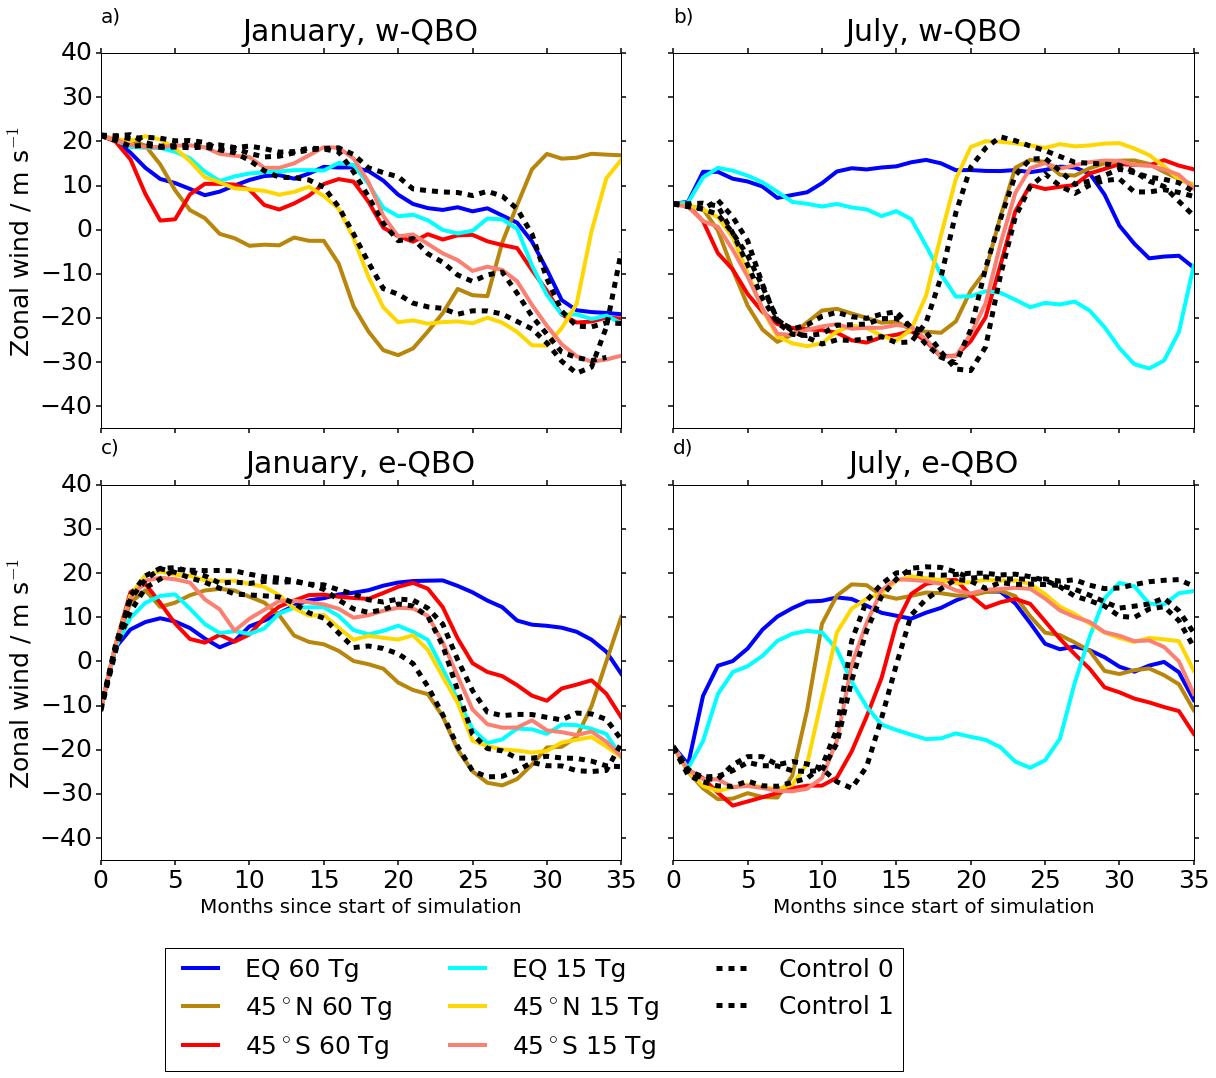

In [41]:
fig, axs = plt.subplots(2,2, sharey = True, sharex = True, figsize = (17,15))


ax = axs.ravel()

for i, season in enumerate(full_list):
    for b, eruption in enumerate(season):
        selection = pressure_selection(30)
        x = range(0, 36)
        y = selection.data
        ax[i].plot(x,y, color = line_colours[b], label = legend_labels, linewidth = 4)
        
    
for i, season in enumerate(control_list):
    for b, eruption in enumerate(season):
        selection = pressure_selection(30)
        x = range(0, eruption.coord('time').shape[0])
        y = selection.data
        ax[i].plot(x, y, 'k--', label = 'Control %s' %b,linewidth = 5)
        
    ax[i].set_title('%s' % names[i], fontsize = 30, y = 1.02) 
    ax[i].set_ylim(-45,40)
    ax[i].xaxis.set_tick_params(width = 1.5, labelsize = 25, direction = 'out', length = 5)
    ax[i].yaxis.set_tick_params(width = 1.5, labelsize = 25, direction = 'out', length = 5)
    ax[i].set_title(letter_labels[i], size=20, loc = 'left', y = 1.07)

    

ax[0].set_ylabel('Zonal wind / m s$^{-1}$', fontsize = 25)
ax[2].set_ylabel('Zonal wind / m s$^{-1}$', fontsize = 25)
    
ax[2].set_xlabel('Months since start of simulation', fontsize = 20)    
ax[3].set_xlabel('Months since start of simulation', fontsize = 20)    
  
plt.legend(legend_labels, prop={'size': 25},bbox_to_anchor=(-1,-0.2), loc='upper left', ncol = 3)

plt.tight_layout() 
plt.subplots_adjust( bottom = 0.2, wspace = 0.1, hspace = 0.15) 
plt.savefig('zonal_wind_30hpa.png')
